<a href="https://colab.research.google.com/github/SherinBojappa/prompting/blob/main/PoolOfPrompts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# get prompts from pool of prompts for a particular dataset and get the length of all the prompts and annotate if they can be classified as xs, s, m, l, and xl
# pool of prompts from - https://github.com/bigscience-workshop/promptsource

In [ ]:
!pip install promptsource

In [6]:
# specify the dataset for which you want the prompts
dataset_name, subset_name = "super_glue", "rte"

In [12]:
prompts = DatasetTemplates(f"{dataset_name}/{subset_name}")

In [13]:
prompts

In [15]:
template_list = prompts.all_template_names

In [16]:
template_list

['GPT-3 style',
 'MNLI crowdsource',
 'based on the previous passage',
 'can we infer',
 'does it follow that',
 'does this imply',
 'guaranteed true',
 'justified in saying',
 'must be true',
 'should assume']

In [21]:
import datasets as datasets
dataset = 'rte'
dev_set = datasets.load_dataset('super_glue', dataset, split='validation')
example = dev_set[0]

Generating train split:   0%|          | 0/2490 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Dataset super_glue downloaded and prepared to /root/.cache/huggingface/datasets/super_glue/rte/1.0.3/bb9675f958ebfee0d5d6dc5476fafe38c79123727a7258d515c450873dbdbbed. Subsequent calls will reuse this data.


In [22]:
result = prompts['GPT-3 style'].apply(example)

In [24]:
print("INPUT: ", result[0])

INPUT:  Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.
Question: Christopher Reeve had an accident. True or False?


In [25]:
print("RESULT: ", result[1])

RESULT:  False


In [26]:
result = prompts['must be true'].apply(example)
print("INPUT: ", result[0])
print("RESULT: ", result[1])

INPUT:  Given that Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation. Therefore, it must be true that "Christopher Reeve had an accident."? Yes or no?
RESULT:  No


In [30]:
# from where the prompt is picked
prompts['must be true'].get_reference()

'Sanh et al. 2021'

In [31]:
prompts['must be true'].get_name()

'must be true'

In [33]:
prompts['based on the previous passage'].apply(example)

['Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation. Based on the previous passage, is it true that "Christopher Reeve had an accident."? Yes or no?',
 'No']

In [34]:
another_example = dev_set[1]

In [35]:
prompts['based on the previous passage'].apply(another_example)

['Yet, we now are discovering that antibiotics are losing their effectiveness against illness. Disease-causing bacteria are mutating faster than we can come up with new antibiotics to fight the new variations. Based on the previous passage, is it true that "Bacteria is winning the war against antibiotics."? Yes or no?',
 'Yes']

In [38]:
last_example = dev_set[-1]
result = prompts['based on the previous passage'].apply(last_example)


In [39]:
result[0]

'Danny Kennedy, Greenpeace campaigns director, said: "The burden of proof in the Scott Parkin expulsion case lies morally with the Commonwealth, to prove that he is a danger. When the Government brought in anti-terror legislation, they promised the public that these laws would only be used to confront a real and present risk of a terrorist attack, not a sweep-all approach against citizens. Peace is not terrorism. Peace is not a threat to national security. No democratic government should expel a foreign citizen because [it] opposes his political opinions." Based on the previous passage, is it true that "Greenpeace director said that peace is terrorism."? Yes or no?'

In [40]:
result[1]

'No'

In [36]:
another_example

{'premise': 'Yet, we now are discovering that antibiotics are losing their effectiveness against illness. Disease-causing bacteria are mutating faster than we can come up with new antibiotics to fight the new variations.',
 'hypothesis': 'Bacteria is winning the war against antibiotics.',
 'idx': 1,
 'label': 0}

In [43]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import pandas as pd

In [45]:
# direct length of the template is not given but rather it needs to be applied on a template, 
# so to find out the length of the template we can subtract the length of the original example with that of the prompt. 
# so this will include the length of the template along with the yes, no part 
data_df = pd.DataFrame(dev_set)

In [47]:
example = data_df['premise']+data_df['hypothesis']

In [49]:
example[0]

'Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.Christopher Reeve had an accident.'

In [50]:
dev_set[0]

{'premise': 'Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.',
 'hypothesis': 'Christopher Reeve had an accident.',
 'idx': 0,
 'label': 1}

In [62]:
def compute_prompt_length(premise, hypothesis, id, template):
  premise_len = len(premise.split(" "))
  hypothesis_len = len(hypothesis.split(" "))
  example_len = premise_len + hypothesis_len
  result = prompts[template].apply(dev_set[id])
  result_len = len(result[0].split(" "))
  return (result_len - example_len)

In [63]:
data_df['template_len'] = data_df.apply(lambda x: compute_prompt_length(x['premise'], x['hypothesis'], x['idx'], template_list[2]), axis=1)

In [66]:
# you can assume that the template length remains the same accross all examples in the dataframe
data_df['template_len'].unique()[0]

12

In [67]:
temp_len = []
for template in template_list:
    example = dev_set[0]
    premise = example['premise']
    hypothesis = example['hypothesis']

    premise_len = len(premise.split(" "))
    hypothesis_len = len(hypothesis.split(" "))
    
    example_len = premise_len + hypothesis_len
    result = prompts[template].apply(example)
    result_len = len(result[0].split(" "))
    temp_len.append(result_len - example_len)


In [71]:
temp_len

[3, 18, 12, 8, 9, 8, 9, 9, 11, 10]

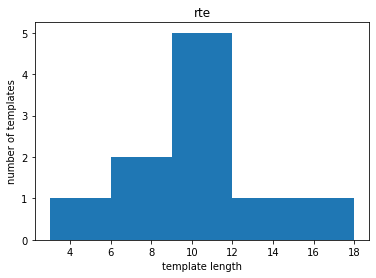

In [75]:
from matplotlib import pyplot as plt
temp_sizes = ['xs', 's', 'm', 'l', 'xl']
plt.hist(temp_len, len(temp_sizes))
plt.xlabel('template length')
plt.ylabel('number of templates')
plt.title('rte')
plt.show()